In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
import os
import cv2
path= "C://Abhinav//Test//Datasets//archive//Training"
classes={'no_tumor':0, 'pituitary_tumor':1}
X=[]
Y=[]

for cls in classes:
    pth=os.path.join(path, cls)
    for j in os.listdir(pth):
        img=cv2.imread(os.path.join(pth, j),0)
        img=cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\abhin\AppData\Local\Temp\ipykernel_11108\824939861.py:3: SyntaxWarning: invalid escape sequence '\D'
  path= "C://Abhinav//Test\Datasets//archive//Training"


In [3]:
X = np.array(X)
Y = np.array(Y)

In [4]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [5]:
X_updated = X.reshape(len(X),-1)

In [6]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

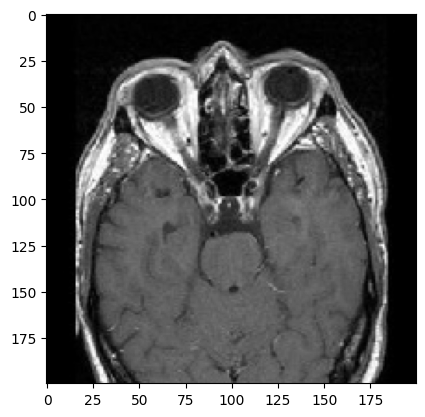

In [7]:
plt.imshow(X[0], cmap='gray')

In [8]:
X_updated=X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

In [10]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

1.0 0.0
1.0 0.0
0.00392156862745098 0.0
0.00392156862745098 0.0


In [14]:
from sklearn.svm import SVC

In [15]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [16]:
print("Training Score: ", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score:  0.9938587512794268
Testing Score: 0.963265306122449


In [18]:
pred=sv.predict(xtest)

In [19]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [20]:
print("Total Misclassified Samples:", len(misclassified[0]))
print(pred[81], ytest[81])

Total Misclassified Samples: 9
0 0


In [21]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

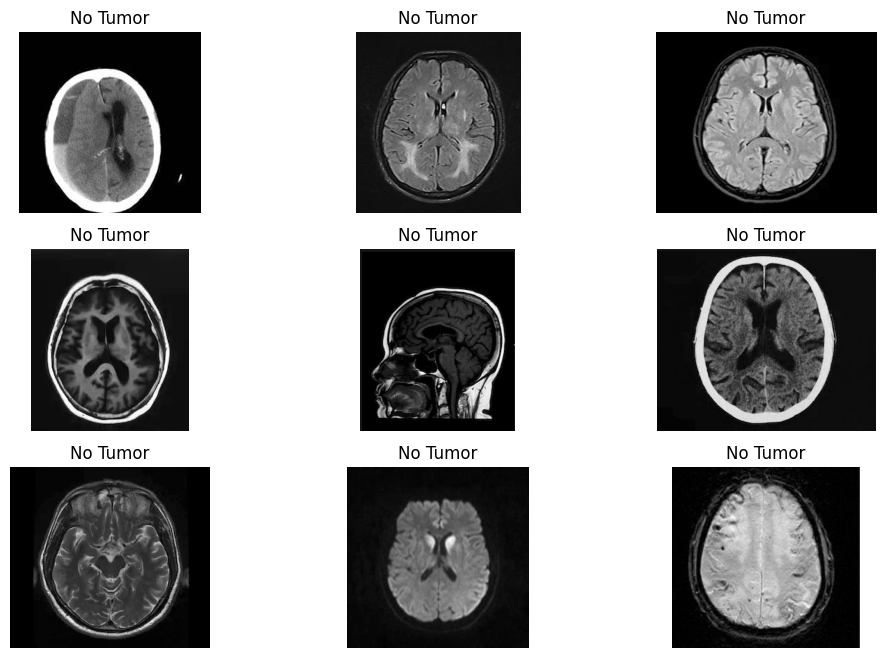

In [23]:
plt.figure(figsize=(12,8))
c=1
path='C://Abhinav//Test//Datasets//archive//Testing//no_tumor'
for i in os.listdir(path)[:9]:
    img=cv2.imread(os.path.join(path,i),0)
    if img is not None:
        p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
        plt.subplot(3,3,c)
        plt.title(dec.get(p[0], 'Unknown'))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        c+=1
    else:
        print(f"Failed to load image:{i}")
        plt.show()

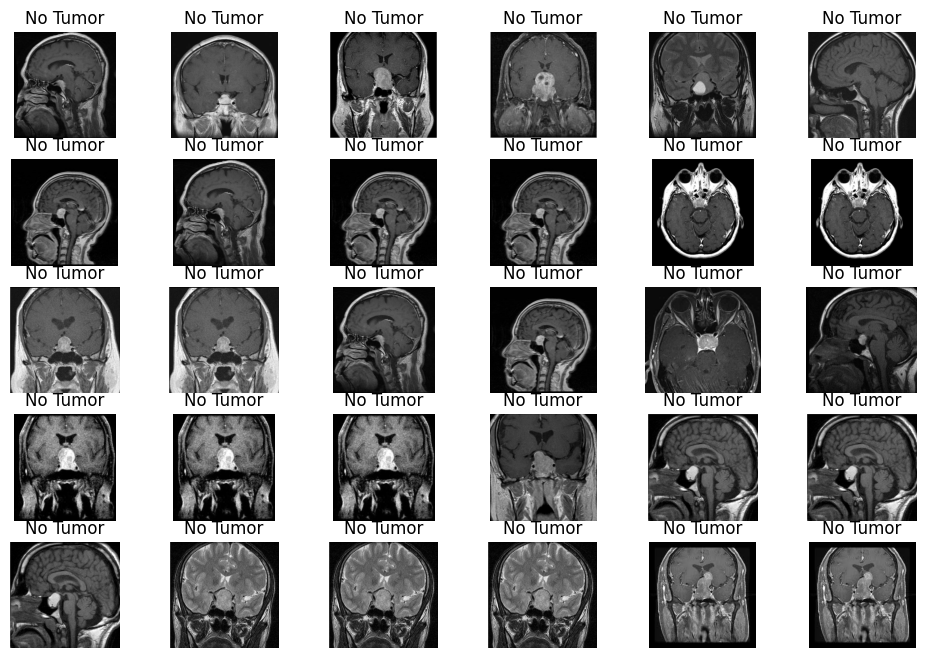

In [24]:
plt.figure(figsize=(12,8))
c=1
path='C://Abhinav//Test//Datasets//archive//Testing//pituitary_tumor'
for i in os.listdir(path)[:30]:
    img=cv2.imread(os.path.join(path,i),0)
    if img is not None:
        p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
        plt.subplot(5,6,c)
        plt.title(dec.get(p[0], 'Unknown'))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        c+=1
    else:
        print(f"Failed to load image:{i}")
        plt.show()